## Model Preprocessing with PCA
Author: Kim Hazed Delfino

In [83]:
import pandas as pd
import numpy as np
# Libs for plots
import matplotlib.pyplot as plt
import seaborn as sns
# Necessary libs 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Metrics
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, RocCurveDisplay
# Import Dataset
from sklearn.datasets import fetch_openml


## Load the Data

In [13]:
# Fetch dataset from sklearn
mnist = fetch_openml("mnist_784")

In [14]:
# View dataset's shape
mnist.data.shape

(70000, 784)

## Custom class to instantiate model and visuals

In [123]:
class ModelMaker:
    def __init__(self, model, X_train, X_test, y_train, y_test, 
                 labels, with_pca = False):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test 
        self.labels = labels

        # Train model 
        scaler = StandardScaler()
        if with_pca: 
            pca = PCA(n_components=.95)
            preprocessor = make_pipeline(scaler,pca)
            self.model_pipe = make_pipeline(preprocessor,model)
        else:
            self.model_pipe = make_pipeline(scaler,model)
        self.model_pipe.fit(X_train,y_train)
        # set hyperparams 
        self.show_params = self.model_pipe.get_params()
        # set prediction
        self.model_train_pred = self.model_pipe.predict(X_train)
        self.model_test_pred = self.model_pipe.predict(X_test)
        # set classfication report
        self.train_dt_report = classification_report(y_train,self.model_train_pred,
                                                target_names=labels)
        self.test_dt_report = classification_report(y_test, self.model_test_pred,
                                            target_names=labels)
     

    # Display Confusion Report 
    def get_report(self):
        report = f"""{self.model} Train Metric Scores: \n {self.train_dt_report} \n
        {self.model} Test Metric Scores: \n {self.test_dt_report}"""
        return print(report)

    def get_visuals(self, normalize = None):


        # Display Confusion Matrix
        fig, axes = plt.subplots(ncols= 2, figsize=(10,5))
        ConfusionMatrixDisplay.from_predictions(self.y_train, 
                                                self.model_train_pred,
                                                ax=axes[0],
                                                cmap="Blues",
                                                normalize=normalize)
        axes[0].set_title("Train CM")
          
        ConfusionMatrixDisplay.from_predictions(self.y_test, 
                                                self.model_test_pred,
                                                ax=axes[1],
                                                cmap="Reds",
                                                normalize=normalize)
        axes[1].set_title("Test CM")
        
        return plt.show()
        

## Instantiate Models 
- KNeighbors base
- KNeighbors with PCA
    - Adding RF model for comparision 
        - RandomForest base
        - RandomForest with PCA

### Assign Feature Matrices and Target Vector

In [21]:
# Train Test Split
X = mnist.data
y = mnist.target

X_train, X_test ,y_train , y_test = train_test_split(X, y, random_state=42)

In [46]:
# Labels for the model scores
labels = ["0","1","2","3","4","5","6","7","8","9"]
# Instantiate Model
knn_base = ModelMaker(KNeighborsClassifier(),X_train, X_test, y_train, y_test, labels)


In [70]:
# Instantiate Model with PCA
knn_pca = ModelMaker(KNeighborsClassifier(), X_train, X_test, y_train, y_test,labels,with_pca=True)

In [84]:
# Instantiate Random Forest 
rf_base = ModelMaker(RandomForestClassifier(), X_train, X_test, y_train, y_test, labels)

In [87]:
# Instantiate Random Forest with PCA
rf_pca = ModelMaker(RandomForestClassifier(), X_train, X_test, y_train, y_test, labels, with_pca=True)

### Display Confusion Matrix for all models

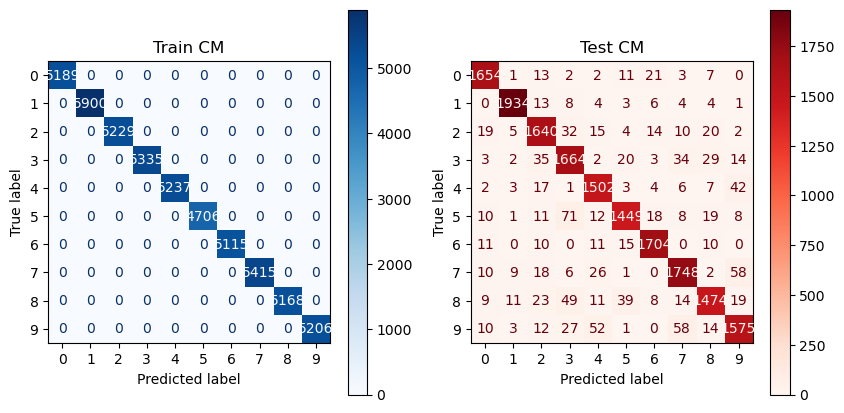

In [119]:
# Show CM for random forest models for comparison
rf_pca.get_visuals() # with PCA


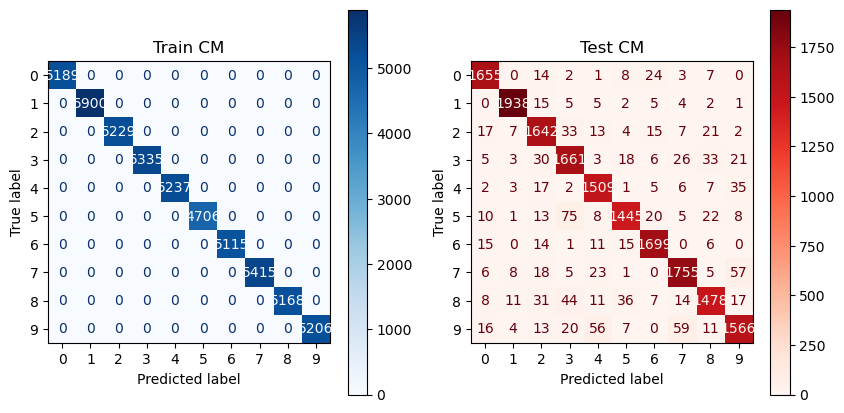

In [120]:

rf_base.get_visuals() # without PCA

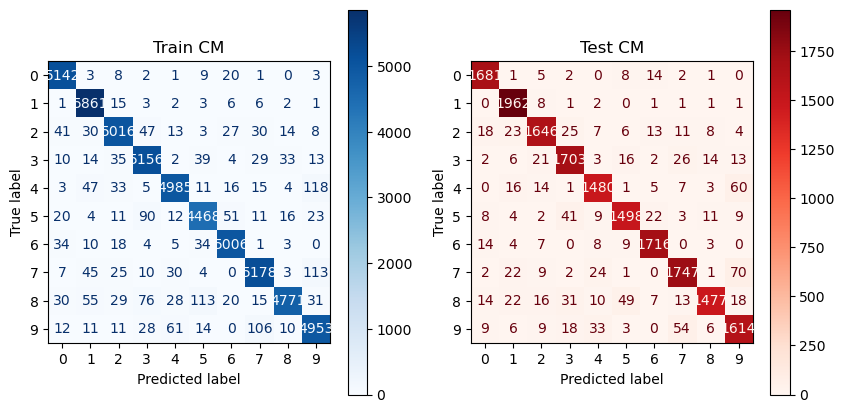

In [121]:
# Show CM for KNN models to compare 
knn_base.get_visuals() # without PCA


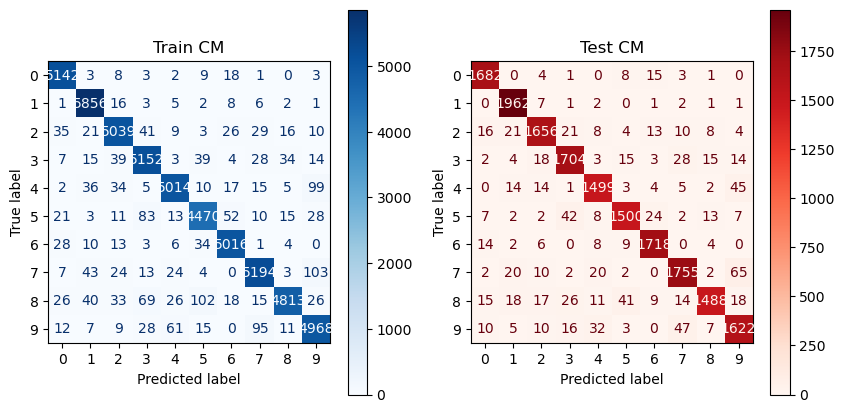

In [122]:
knn_pca.get_visuals() # With PCA

### Display Metric scores for all models

In [124]:
knn_base.get_report() # without PCA

KNeighborsClassifier() Train Metric Scores: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5189
           1       0.96      0.99      0.98      5900
           2       0.96      0.96      0.96      5229
           3       0.95      0.97      0.96      5335
           4       0.97      0.95      0.96      5237
           5       0.95      0.95      0.95      4706
           6       0.97      0.98      0.98      5115
           7       0.96      0.96      0.96      5415
           8       0.98      0.92      0.95      5168
           9       0.94      0.95      0.95      5206

    accuracy                           0.96     52500
   macro avg       0.96      0.96      0.96     52500
weighted avg       0.96      0.96      0.96     52500
 

        KNeighborsClassifier() Test Metric Scores: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1714
           1       0.95      0.

In [126]:
knn_pca.get_report() # With PCA 

KNeighborsClassifier() Train Metric Scores: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5189
           1       0.97      0.99      0.98      5900
           2       0.96      0.96      0.96      5229
           3       0.95      0.97      0.96      5335
           4       0.97      0.96      0.96      5237
           5       0.95      0.95      0.95      4706
           6       0.97      0.98      0.98      5115
           7       0.96      0.96      0.96      5415
           8       0.98      0.93      0.96      5168
           9       0.95      0.95      0.95      5206

    accuracy                           0.97     52500
   macro avg       0.96      0.96      0.96     52500
weighted avg       0.97      0.97      0.96     52500
 

        KNeighborsClassifier() Test Metric Scores: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1714
           1       0.96      0.

In [127]:
rf_base.get_report() # without PCA

RandomForestClassifier() Train Metric Scores: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5189
           1       1.00      1.00      1.00      5900
           2       1.00      1.00      1.00      5229
           3       1.00      1.00      1.00      5335
           4       1.00      1.00      1.00      5237
           5       1.00      1.00      1.00      4706
           6       1.00      1.00      1.00      5115
           7       1.00      1.00      1.00      5415
           8       1.00      1.00      1.00      5168
           9       1.00      1.00      1.00      5206

    accuracy                           1.00     52500
   macro avg       1.00      1.00      1.00     52500
weighted avg       1.00      1.00      1.00     52500
 

        RandomForestClassifier() Test Metric Scores: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1714
           1       0.98    

In [128]:
rf_pca.get_report() # with PCA

RandomForestClassifier() Train Metric Scores: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5189
           1       1.00      1.00      1.00      5900
           2       1.00      1.00      1.00      5229
           3       1.00      1.00      1.00      5335
           4       1.00      1.00      1.00      5237
           5       1.00      1.00      1.00      4706
           6       1.00      1.00      1.00      5115
           7       1.00      1.00      1.00      5415
           8       1.00      1.00      1.00      5168
           9       1.00      1.00      1.00      5206

    accuracy                           1.00     52500
   macro avg       1.00      1.00      1.00     52500
weighted avg       1.00      1.00      1.00     52500
 

        RandomForestClassifier() Test Metric Scores: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1714
           1       0.98    

### Display Process times for Test predictions on all models

In [140]:
%timeit knn_base.model_test_pred # KNN Without PCA

30.8 ns ± 0.894 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [139]:
%timeit knn_pca.model_test_pred # KNN With PCA

30.6 ns ± 0.958 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [135]:
%timeit rf_base.model_test_pred # RF without PCA

36.6 ns ± 0.923 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [136]:
%timeit rf_pca.model_test_pred # RF with PCA

30.4 ns ± 0.961 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


# Conclusion

- Without tuning the model and just adding PCA in Preprocessor , our 2 models performed better than base model and ran slightly faster 
- Each run of the cell show different results but with PCA models shows consistent trend of faster process times
    - knn model without PCA : 30.8 ns ± 0.894 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
    - knn model with PCA : 30.6 ns ± 0.958 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
    - rf model withour PCA : 36.6 ns ± 0.923 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
    - rf model with PCA : 30.4 ns ± 0.961 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)